<a href="https://colab.research.google.com/github/kwanjira16254200/pandas/blob/main/ML1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
from sklearn.linear_model import LinearRegression
import pandas as pd

data = pd.read_csv("train_small.csv")
##X = np.array([[1, 1], [1, 2], [2, 2], [2, 3]])
##y = np.dot(X, np.array([1, 2])) + 3
##reg = LinearRegression().fit(X, y)

#df = data.drop(columns=['key','pickup_longitude','pickup_latitude','dropoff_longitude','dropoff_latitude','passenger_count'])
df = data.drop(columns=['key','pickup_datetime'])
df


,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,10.5,-73.978400,40.751700,-74.010500,40.713600,1
1,56.5,-74.000777,40.728885,-74.138033,40.550097,5
2,8.5,-73.978781,40.766801,-73.953289,40.788527,1
3,0.0,-73.987115,40.738808,-74.005911,40.713960,1
4,6.5,-73.897678,40.752456,-73.897678,40.752456,1
...,...,...,...,...,...,...
417994,4.9,-73.983748,40.760578,-73.995802,40.759285,1
417995,6.0,-73.978882,40.754275,-73.967487,40.757452,1
417996,25.0,-73.960121,40.710621,-73.977768,40.763439,1
417997,14.1,-73.976267,40.714955,-73.990797,40.723652,4


In [ ]:
df_list = df['fare_amount'].head(10).values.tolist()
df_list #อยากรู้ตัวfare_amount10แรก

[10.5, 56.5, 8.5, 0.0, 6.5, 8.5, 8.5, 34.0, 5.3, 10.5]

In [ ]:
avg = df['fare_amount'].mean()
avg #อยากรู้ค่าเฉลี่ย

11.368328082125235

In [ ]:
y = df['fare_amount'].head(110000).values.tolist()
x = []
for i in range (len(df['fare_amount'].head(110000).values.tolist())): #หาจำนวนที่อยู่ในวัตถุนั้น โดยวัตถุนั้นจะเป็น string, tuple, list หรือ range 
  x1 = [abs(df['dropoff_longitude'][i]-df['pickup_longitude'][i]),abs(df['dropoff_latitude'][i]-df['pickup_latitude'][i]),df['passenger_count'][i]]
  x.append(x1)

reg = LinearRegression().fit(x, y) #การนำข้อมูลที่ได้มาคำนวณหาสมการเพื่อแทนลักษณะของข้อมูลนั้น ๆซึ่งข้อมูลตัวเลข 2 ชุด คือ 1) ตัวแปรอิสระ x 2) ตัวแปรตาม Y^ 
reg.predict(np.array([[abs(-74.000777-(-74.138033)),abs(40.728885-40.550097),5]]))

array([11.72399527])

In [ ]:
reg.coef_ #ค่าสัมประสิทธ์ที่มีผลต่อตัวแปรนั้น ๆอยู่ในช่วง -1ถึง1

array([0.01110077, 0.09006985, 0.103516  ])

In [ ]:
reg.intercept_ #ค่าที่บ่งบอกจุดตัดแกน

11.188788203855598

In [ ]:
reg.score(x, y)

0.0006298125807435717

###Poly

In [ ]:
import pandas as pd
xdic={'X': {11: 300, 12: 170, 13: 288, 14: 360, 15: 319, 16: 330, 17: 520, 18: 345, 19: 399, 20: 479}}
ydic={'y': {11: 305000, 12: 270000, 13: 360000, 14: 370000, 15: 379000, 16: 405000, 17: 407500, 18: 450000, 19: 450000, 20: 485000}}
X=pd.DataFrame.from_dict(xdic)
y=pd.DataFrame.from_dict(ydic)
import numpy as np
X_seq = np.linspace(X.min(),X.max(),300).reshape(-1,1)
X

,X
11,300
12,170
13,288
14,360
15,319
16,330
17,520
18,345
19,399
20,479


In [ ]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression
degree=9
polyreg=make_pipeline(PolynomialFeatures(degree),LinearRegression())
polyreg.fit(X,y)

Pipeline(memory=None,
         steps=[('polynomialfeatures',
                 PolynomialFeatures(degree=9, include_bias=True,
                                    interaction_only=False, order='C')),
                ('linearregression',
                 LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
                                  normalize=False))],
         verbose=False)

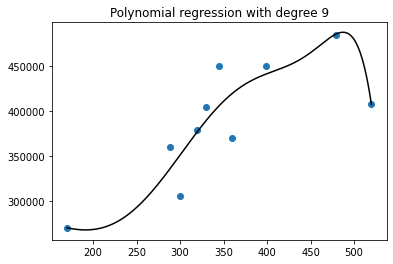

In [ ]:
import matplotlib.pyplot as plt
plt.figure()
plt.scatter(X,y)
plt.plot(X_seq,polyreg.predict(X_seq),color="black")
plt.title("Polynomial regression with degree "+str(degree))
plt.show()

###Poly Nu

In [ ]:
import numpy as np
from sklearn.linear_model import LinearRegression
import pandas as pd

data = pd.read_csv('train_small.csv')
##X = np.array([[1, 1], [1, 2], [2, 2], [2, 3]])
##y = np.dot(X, np.array([1, 2])) + 3
##reg = LinearRegression().fit(X, y)

#df = data.drop(columns=['key','pickup_longitude','pickup_latitude','dropoff_longitude','dropoff_latitude','passenger_count'])
df = data.drop(columns=['key','pickup_datetime']) #ทิ้ง
df = df[(df.T != 0).all()]
df = df[(df.T <= 180).all()]
df = df[(df.T >= -180).all()]
df


,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,10.5,-73.978400,40.751700,-74.010500,40.713600,1
1,56.5,-74.000777,40.728885,-74.138033,40.550097,5
2,8.5,-73.978781,40.766801,-73.953289,40.788527,1
4,6.5,-73.897678,40.752456,-73.897678,40.752456,1
5,8.5,-73.967647,40.763077,-73.977438,40.787097,2
...,...,...,...,...,...,...
417994,4.9,-73.983748,40.760578,-73.995802,40.759285,1
417995,6.0,-73.978882,40.754275,-73.967487,40.757452,1
417996,25.0,-73.960121,40.710621,-73.977768,40.763439,1
417997,14.1,-73.976267,40.714955,-73.990797,40.723652,4


In [ ]:
import math
y = pd.DataFrame(df["fare_amount"])
#X = math.sqrt(((df["pickup_longitude"]-df["dropoff_longitude"])**2)+((df["dropoff_latitude"]-df["pickup_latitude"])**2))
X = []
for i in y["fare_amount"].index:
  a = math.sqrt(((df["pickup_longitude"][i]-df["dropoff_longitude"][i])**2)+((df["dropoff_latitude"][i]-df["pickup_latitude"][i])**2))
  X.append(a)

X = np.array(X).reshape(-1,1) #array แบบหนึ่งมิติ มีสมาชิกทั้งหมด x ตัว จากนั้นเปลี่ยนมิติเป็น 2 มิติ โดยให้มีแถว -1 แถว แต่ละแถวมีสมาชิก 1 ตัว?? พารามิเตอร์จะเป็น1
X

array([[0.04981988],
       [0.22539822],
       [0.0334942 ],
       ...,
       [0.05568826],
       [0.01693395],
       [0.0261642 ]])

In [ ]:
y

,fare_amount
0,10.5
1,56.5
2,8.5
4,6.5
5,8.5
...,...
417994,4.9
417995,6.0
417996,25.0
417997,14.1


In [ ]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression
degree=1
polyreg=make_pipeline(PolynomialFeatures(degree),LinearRegression())
polyreg.fit(X,y)

Pipeline(memory=None,
         steps=[('polynomialfeatures',
                 PolynomialFeatures(degree=1, include_bias=True,
                                    interaction_only=False, order='C')),
                ('linearregression',
                 LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
                                  normalize=False))],
         verbose=False)

In [ ]:
X

array([[0.04981988],
       [0.22539822],
       [0.0334942 ],
       ...,
       [0.05568826],
       [0.01693395],
       [0.0261642 ]])

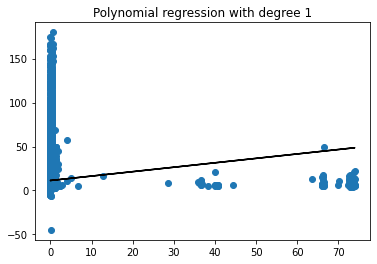

In [ ]:
import matplotlib.pyplot as plt
X_s = X
plt.figure()
plt.scatter(X,y)
plt.plot(X_s,polyreg.predict(X_s),color="black")
plt.title("Polynomial regression with degree "+str(degree))
plt.show()

In [ ]:
s = polyreg.predict(X_s)
s

array([[11.34755085],
       [11.43599798],
       [11.33932683],
       ...,
       [11.35050703],
       [11.33098465],
       [11.33563437]])

In [ ]:
test = pd.read_csv('test_small.csv')
test

,key,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,2009-06-15 17:26:21.0000001,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.841610,40.712278,1
1,2010-01-05 16:52:16.0000002,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,1
2,2011-08-18 00:35:00.00000049,2011-08-18 00:35:00 UTC,-73.982738,40.761270,-73.991242,40.750562,2
3,2012-04-21 04:30:42.0000001,2012-04-21 04:30:42 UTC,-73.987130,40.733143,-73.991567,40.758092,1
4,2010-03-09 07:51:00.000000135,2010-03-09 07:51:00 UTC,-73.968095,40.768008,-73.956655,40.783762,1
...,...,...,...,...,...,...,...
9994,2010-08-27 08:45:01.0000004,2010-08-27 08:45:01 UTC,-73.983616,40.756005,-73.976169,40.763282,1
9995,2011-10-26 10:44:00.00000086,2011-10-26 10:44:00 UTC,-73.988277,40.748970,-73.963712,40.773958,2
9996,2011-12-16 15:37:00.000000179,2011-12-16 15:37:00 UTC,-74.002112,40.748727,-73.992467,40.756252,1
9997,2013-11-16 22:47:17.0000001,2013-11-16 22:47:17 UTC,-73.992093,40.729071,-73.974470,40.763050,2


In [ ]:
import math

#X = math.sqrt(((df["pickup_longitude"]-df["dropoff_longitude"])**2)+((df["dropoff_latitude"]-df["pickup_latitude"])**2))
X_test = []
for i in test["key"].index:
  a = math.sqrt(((test["pickup_longitude"][i]-test["dropoff_longitude"][i])**2)+((test["dropoff_latitude"][i]-test["pickup_latitude"][i])**2))
  X_test.append(a)

X_test = np.array(X_test).reshape(-1,1)
X_test

array([[0.00943584],
       [0.07969567],
       [0.01367404],
       ...,
       [0.01223322],
       [0.03827718],
       [0.01403717]])

In [ ]:
result = polyreg.predict(X_test)
result

array([[11.3272075 ],
       [11.3626007 ],
       [11.32934248],
       ...,
       [11.32861667],
       [11.34173625],
       [11.3295254 ]])

In [ ]:
from google.colab import files
import csv
send = pd.DataFrame(result)
send.to_csv('send.csv', index=False)

#files.download("data.csv")


###วิธีที่1

In [ ]:
import numpy as np
from sklearn.linear_model import LinearRegression
import pandas as pd

data = pd.read_csv('train_small.csv')
##X = np.array([[1, 1], [1, 2], [2, 2], [2, 3]])
##y = np.dot(X, np.array([1, 2])) + 3
##reg = LinearRegression().fit(X, y)

#df = data.drop(columns=['key','pickup_longitude','pickup_latitude','dropoff_longitude','dropoff_latitude','passenger_count'])
df = data.drop(columns=['key','pickup_datetime'])
df = df[(df.T != 0).all()]
df = df[(df.T <= 180).all()]
df = df[(df.T >= -180).all()]
df

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,10.5,-73.978400,40.751700,-74.010500,40.713600,1
1,56.5,-74.000777,40.728885,-74.138033,40.550097,5
2,8.5,-73.978781,40.766801,-73.953289,40.788527,1
4,6.5,-73.897678,40.752456,-73.897678,40.752456,1
5,8.5,-73.967647,40.763077,-73.977438,40.787097,2
...,...,...,...,...,...,...
417994,4.9,-73.983748,40.760578,-73.995802,40.759285,1
417995,6.0,-73.978882,40.754275,-73.967487,40.757452,1
417996,25.0,-73.960121,40.710621,-73.977768,40.763439,1
417997,14.1,-73.976267,40.714955,-73.990797,40.723652,4


In [ ]:
import math
y = pd.DataFrame(df["fare_amount"])
#X = math.sqrt(((df["pickup_longitude"]-df["dropoff_longitude"])**2)+((df["dropoff_latitude"]-df["pickup_latitude"])**2))
X = []
for i in y["fare_amount"].index:
  a = math.sqrt(((df["pickup_longitude"][i]-df["dropoff_longitude"][i])**2)+((df["dropoff_latitude"][i]-df["pickup_latitude"][i])**2))
  X.append(a)

X = np.array(X)


In [ ]:
y

,fare_amount
0,10.5
1,56.5
2,8.5
4,6.5
5,8.5
...,...
417994,4.9
417995,6.0
417996,25.0
417997,14.1


In [ ]:
X

array([0.04981988, 0.22539822, 0.0334942 , ..., 0.05568826, 0.01693395,
       0.0261642 ])

In [ ]:
new_df = y
new_df["distance"] = X
new_df

,fare_amount,distance
0,10.5,0.049820
1,56.5,0.225398
2,8.5,0.033494
4,6.5,0.000000
5,8.5,0.025939
...,...,...
417994,4.9,0.012123
417995,6.0,0.011830
417996,25.0,0.055688
417997,14.1,0.016934


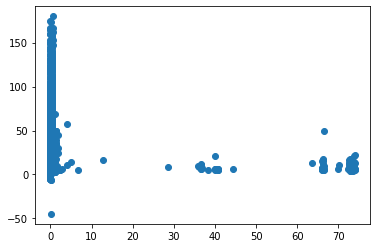

In [ ]:
plt.scatter(new_df["distance"],new_df["fare_amount"])

In [ ]:
x_min_10 = []
y_min_10 = []
for i in new_df["fare_amount"].index:
  if(new_df["distance"][i] <= 10):
    x_min_10.append(new_df["distance"][i])
    y_min_10.append(new_df["fare_amount"][i])
x_min_10


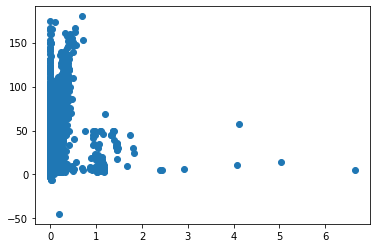

In [ ]:
plt.scatter(x_min_10,y_min_10)

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression
degree=1
n_X = np.array(x_min_10).reshape(-1,1)
n_y = np.array(y_min_10).reshape(-1,1)
polyreg=make_pipeline(PolynomialFeatures(degree),LinearRegression())
polyreg.fit(n_X,n_y)

Pipeline(memory=None,
         steps=[('polynomialfeatures',
                 PolynomialFeatures(degree=1, include_bias=True,
                                    interaction_only=False, order='C')),
                ('linearregression',
                 LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
                                  normalize=False))],
         verbose=False)

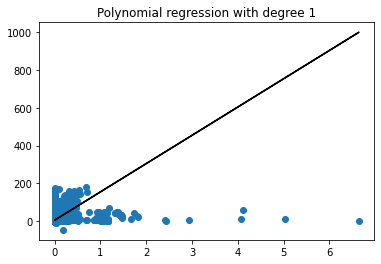

In [ ]:
import matplotlib.pyplot as plt
X_s = n_X
plt.figure()
plt.scatter(n_X,n_y)
plt.plot(X_s,polyreg.predict(X_s),color="black")
plt.title("Polynomial regression with degree "+str(degree))
plt.show()

In [ ]:
result2 = polyreg.predict(X_s)
result2

array([[13.63785659],
       [39.83652253],
       [11.20184415],
       ...,
       [14.51349834],
       [ 8.73083155],
       [10.10811016]])

In [ ]:
df = pd.read_csv('test_small.csv')
df

,key,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,2009-06-15 17:26:21.0000001,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.841610,40.712278,1
1,2010-01-05 16:52:16.0000002,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,1
2,2011-08-18 00:35:00.00000049,2011-08-18 00:35:00 UTC,-73.982738,40.761270,-73.991242,40.750562,2
3,2012-04-21 04:30:42.0000001,2012-04-21 04:30:42 UTC,-73.987130,40.733143,-73.991567,40.758092,1
4,2010-03-09 07:51:00.000000135,2010-03-09 07:51:00 UTC,-73.968095,40.768008,-73.956655,40.783762,1
...,...,...,...,...,...,...,...
9994,2010-08-27 08:45:01.0000004,2010-08-27 08:45:01 UTC,-73.983616,40.756005,-73.976169,40.763282,1
9995,2011-10-26 10:44:00.00000086,2011-10-26 10:44:00 UTC,-73.988277,40.748970,-73.963712,40.773958,2
9996,2011-12-16 15:37:00.000000179,2011-12-16 15:37:00 UTC,-74.002112,40.748727,-73.992467,40.756252,1
9997,2013-11-16 22:47:17.0000001,2013-11-16 22:47:17 UTC,-73.992093,40.729071,-73.974470,40.763050,2


In [ ]:
import numpy as np
from sklearn.linear_model import LinearRegression
import pandas as pd
df = pd.read_csv('test_small.csv')
df

,key,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,2009-06-15 17:26:21.0000001,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.841610,40.712278,1
1,2010-01-05 16:52:16.0000002,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,1
2,2011-08-18 00:35:00.00000049,2011-08-18 00:35:00 UTC,-73.982738,40.761270,-73.991242,40.750562,2
3,2012-04-21 04:30:42.0000001,2012-04-21 04:30:42 UTC,-73.987130,40.733143,-73.991567,40.758092,1
4,2010-03-09 07:51:00.000000135,2010-03-09 07:51:00 UTC,-73.968095,40.768008,-73.956655,40.783762,1
...,...,...,...,...,...,...,...
9994,2010-08-27 08:45:01.0000004,2010-08-27 08:45:01 UTC,-73.983616,40.756005,-73.976169,40.763282,1
9995,2011-10-26 10:44:00.00000086,2011-10-26 10:44:00 UTC,-73.988277,40.748970,-73.963712,40.773958,2
9996,2011-12-16 15:37:00.000000179,2011-12-16 15:37:00 UTC,-74.002112,40.748727,-73.992467,40.756252,1
9997,2013-11-16 22:47:17.0000001,2013-11-16 22:47:17 UTC,-73.992093,40.729071,-73.974470,40.763050,2


In [ ]:
import math

#X = math.sqrt(((df["pickup_longitude"]-df["dropoff_longitude"])**2)+((df["dropoff_latitude"]-df["pickup_latitude"])**2))
X = []
for i in df["pickup_longitude"].index:
  a = math.sqrt(((df["pickup_longitude"][i]-df["dropoff_longitude"][i])**2)+((df["dropoff_latitude"][i]-df["pickup_latitude"][i])**2))
  X.append(a)

X = np.array(X)

In [ ]:
X = np.array(X).reshape(-1,1)
X

array([[0.00943584],
       [0.07969567],
       [0.01367404],
       ...,
       [0.01223322],
       [0.03827718],
       [0.01403717]])

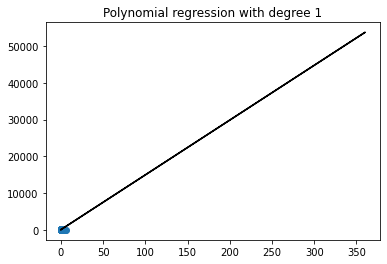

In [ ]:
import matplotlib.pyplot as plt
X_s = X
plt.figure()
plt.scatter(n_X,n_y)
plt.plot(X_s,polyreg.predict(X_s),color="black")
plt.title("Polynomial regression with degree "+str(degree))
plt.show()

In [ ]:
result4 = polyreg.predict(X_s)
result4

array([[ 7.61201188],
       [18.09572951],
       [ 8.24440816],
       ...,
       [ 8.02941867],
       [11.91553029],
       [ 8.29859183]])

In [ ]:
from google.colab import files
import csv
send = pd.DataFrame(result4)
send.to_csv('send4.csv', index=False)

###วิธีที่2

In [ ]:
import numpy as np
from sklearn.linear_model import LinearRegression
import pandas as pd

data = pd.read_csv('train_small.csv')
##X = np.array([[1, 1], [1, 2], [2, 2], [2, 3]])
##y = np.dot(X, np.array([1, 2])) + 3
##reg = LinearRegression().fit(X, y)

#df = data.drop(columns=['key','pickup_longitude','pickup_latitude','dropoff_longitude','dropoff_latitude','passenger_count'])
df = data.drop(columns=['key','pickup_datetime'])
df = df[(df.T != 0).all()]
df = df[(df.T <= 180).all()]
df = df[(df.T >= -180).all()]
df

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,10.5,-73.978400,40.751700,-74.010500,40.713600,1
1,56.5,-74.000777,40.728885,-74.138033,40.550097,5
2,8.5,-73.978781,40.766801,-73.953289,40.788527,1
4,6.5,-73.897678,40.752456,-73.897678,40.752456,1
5,8.5,-73.967647,40.763077,-73.977438,40.787097,2
...,...,...,...,...,...,...
417994,4.9,-73.983748,40.760578,-73.995802,40.759285,1
417995,6.0,-73.978882,40.754275,-73.967487,40.757452,1
417996,25.0,-73.960121,40.710621,-73.977768,40.763439,1
417997,14.1,-73.976267,40.714955,-73.990797,40.723652,4


In [ ]:
import math
y = pd.DataFrame(df["fare_amount"])
#X = math.sqrt(((df["pickup_longitude"]-df["dropoff_longitude"])**2)+((df["dropoff_latitude"]-df["pickup_latitude"])**2))
X = []
for i in y["fare_amount"].index:
  a = math.sqrt(((df["pickup_longitude"][i]-df["dropoff_longitude"][i])**2)+((df["dropoff_latitude"][i]-df["pickup_latitude"][i])**2))
  X.append(a)

X = np.array(X)


In [ ]:
new_df2 = y
new_df2["distance"] = X
new_df2

,fare_amount,distance
0,10.5,0.049820
1,56.5,0.225398
2,8.5,0.033494
4,6.5,0.000000
5,8.5,0.025939
...,...,...
417994,4.9,0.012123
417995,6.0,0.011830
417996,25.0,0.055688
417997,14.1,0.016934


In [ ]:
x_min_10 = []
y_min_10 = []
for i in new_df2["fare_amount"].index:
  if(new_df2["distance"][i] <= 10):
    x_min_10.append(new_df2["distance"][i])
    y_min_10.append(new_df2["fare_amount"][i])
x_min_10 = np.array(x_min_10).reshape(-1,1)
y_min_10 = np.array(y_min_10).reshape(-1,1)

In [ ]:
reg = LinearRegression().fit(x_min_10, y_min_10)

In [ ]:
reg.predict(np.array([[1]]))

array([[155.41759293]])

In [ ]:
reg.coef_

array([[149.21353614]])

In [ ]:
reg.intercept_

array([6.20405679])

In [ ]:
reg.score(x_min_10, y_min_10)

0.5233666555109207

In [ ]:
df = pd.read_csv('test_small.csv')
df

,key,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,2009-06-15 17:26:21.0000001,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.841610,40.712278,1
1,2010-01-05 16:52:16.0000002,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,1
2,2011-08-18 00:35:00.00000049,2011-08-18 00:35:00 UTC,-73.982738,40.761270,-73.991242,40.750562,2
3,2012-04-21 04:30:42.0000001,2012-04-21 04:30:42 UTC,-73.987130,40.733143,-73.991567,40.758092,1
4,2010-03-09 07:51:00.000000135,2010-03-09 07:51:00 UTC,-73.968095,40.768008,-73.956655,40.783762,1
...,...,...,...,...,...,...,...
9994,2010-08-27 08:45:01.0000004,2010-08-27 08:45:01 UTC,-73.983616,40.756005,-73.976169,40.763282,1
9995,2011-10-26 10:44:00.00000086,2011-10-26 10:44:00 UTC,-73.988277,40.748970,-73.963712,40.773958,2
9996,2011-12-16 15:37:00.000000179,2011-12-16 15:37:00 UTC,-74.002112,40.748727,-73.992467,40.756252,1
9997,2013-11-16 22:47:17.0000001,2013-11-16 22:47:17 UTC,-73.992093,40.729071,-73.974470,40.763050,2


In [ ]:
dis = []
for i in df["key"].index:
  a = math.sqrt(((df["pickup_longitude"][i]-df["dropoff_longitude"][i])**2)+((df["dropoff_latitude"][i]-df["pickup_latitude"][i])**2))
  dis .append(a)
dis = np.array(dis).reshape(-1,1)
dis

array([[0.00943584],
       [0.07969567],
       [0.01367404],
       ...,
       [0.01223322],
       [0.03827718],
       [0.01403717]])

In [ ]:
result5 = reg.predict(dis)

In [ ]:
result5

array([[ 7.61201188],
       [18.09572951],
       [ 8.24440816],
       ...,
       [ 8.02941867],
       [11.91553029],
       [ 8.29859183]])

In [ ]:
from google.colab import files
import csv
send = pd.DataFrame(result5)
send.to_csv('send5.csv', index=False)